In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

In [2]:
# Step 2: File upload function for Jupyter Notebook
def load_csv_in_jupyter():
    try:
        # Option 1: Direct File Path
        dataset_path = input("Enter the file path for your CSV dataset (or press Enter to upload): ").strip()
        
        if dataset_path and os.path.exists(dataset_path):
            print(f"Loading dataset from path: {dataset_path}")
            return pd.read_csv(dataset_path)
        else:
            # Option 2: Manual Upload
            print("Upload your dataset...")
            from ipywidgets import FileUpload
            upload = FileUpload(accept='.csv', multiple=False)
            display(upload)

            # Wait for the user to upload a file
            while not upload.value:
                pass  # Keeps checking until a file is uploaded
            
            uploaded_file = list(upload.value.values())[0]
            dataset = pd.read_csv(io.BytesIO(uploaded_file['content']))
            print("Dataset uploaded successfully!")
            return dataset

    except Exception as e:
        print(f"Error occurred: {e}")
        return None

In [3]:
# Step 3: Load the dataset
credit_card_data = load_csv_in_jupyter()

Enter the file path for your CSV dataset (or press Enter to upload):  Downloads/creditcard_2023.csv


Loading dataset from path: Downloads/creditcard_2023.csv


In [4]:
credit_card_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
credit_card_data.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
credit_card_data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
credit_card_data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [9]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(284315, 31)


In [10]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [12]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


In [13]:
X = credit_card_data.drop(columns='Class', axis=1)
Y = credit_card_data['Class']

In [14]:
print(X)

            id        V1        V2        V3        V4        V5        V6  \
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V20       V21  

In [15]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(568630, 30) (454904, 30) (113726, 30)


In [18]:
model = DecisionTreeClassifier()

In [19]:
import time

# Start the timer
start_time = time.time()

# Fit the model
model.fit(X_train, Y_train)

# End the timer
end_time = time.time()

# Calculate and display the elapsed time
elapsed_time = end_time - start_time
print(f"Time taken to fit the model: {elapsed_time:.2f} seconds")

Time taken to fit the model: 22.61 seconds


In [20]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [21]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [22]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [23]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9995867259905387


In [24]:
# Make predictions on the test set
Y_pred = model.predict(X_test)
Y_pred_proba = model.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56839    24]
 [   23 56840]]


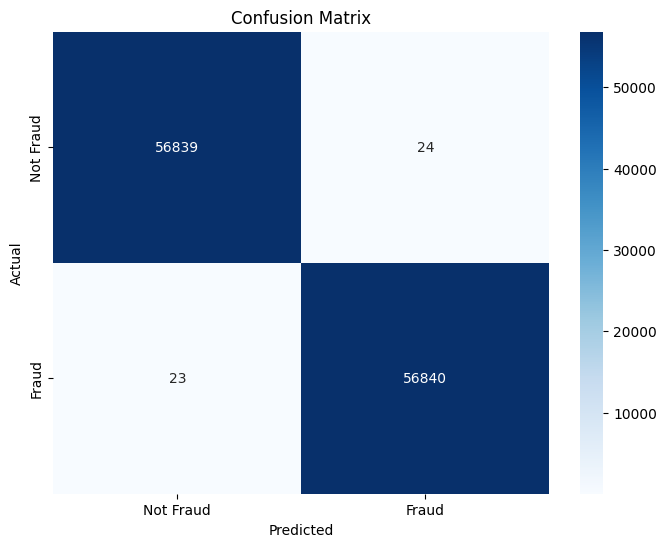

In [25]:
# Print classification report
print(classification_report(Y_test, Y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ROC AUC Score: 0.9995867259905387


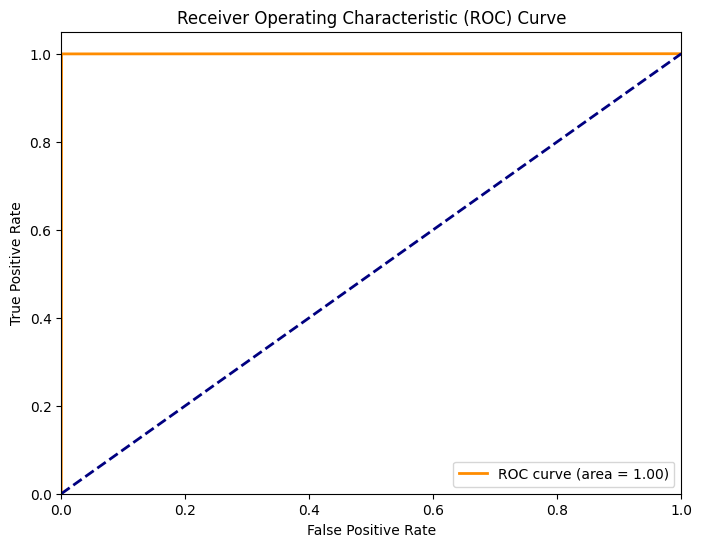

In [26]:
# ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
# Calculate Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9996


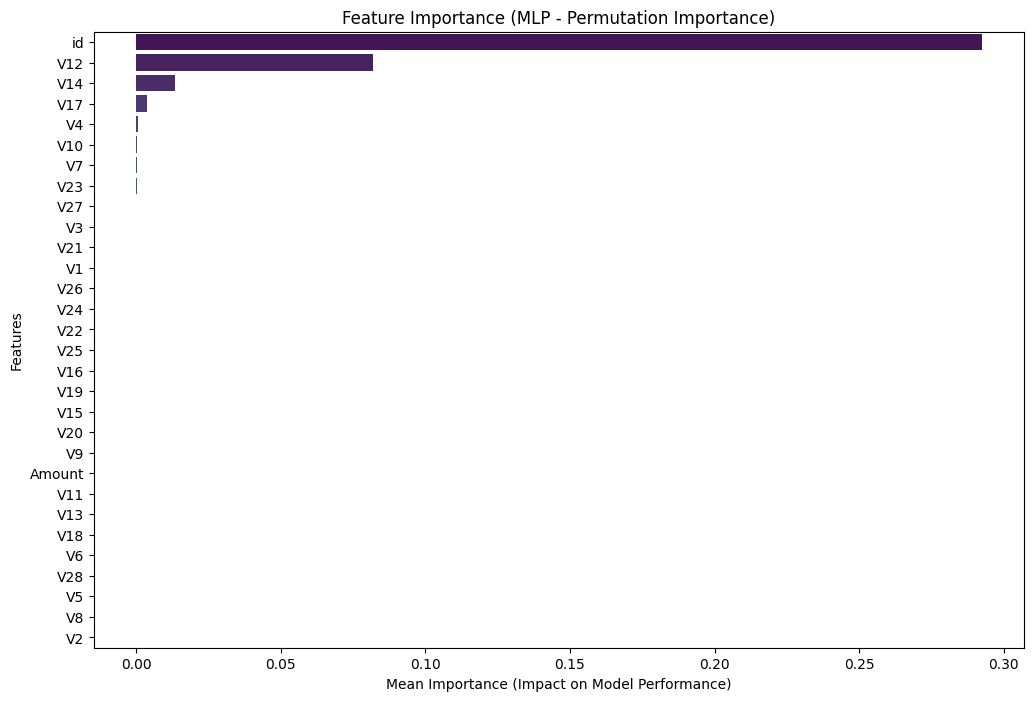

In [28]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, Y_test, n_repeats=10, random_state=42)

# Extract feature importance
feature_importance = perm_importance.importances_mean
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Feature', dodge=False, legend=False)
plt.title('Feature Importance (MLP - Permutation Importance)')
plt.xlabel('Mean Importance (Impact on Model Performance)')
plt.ylabel('Features')
plt.show()

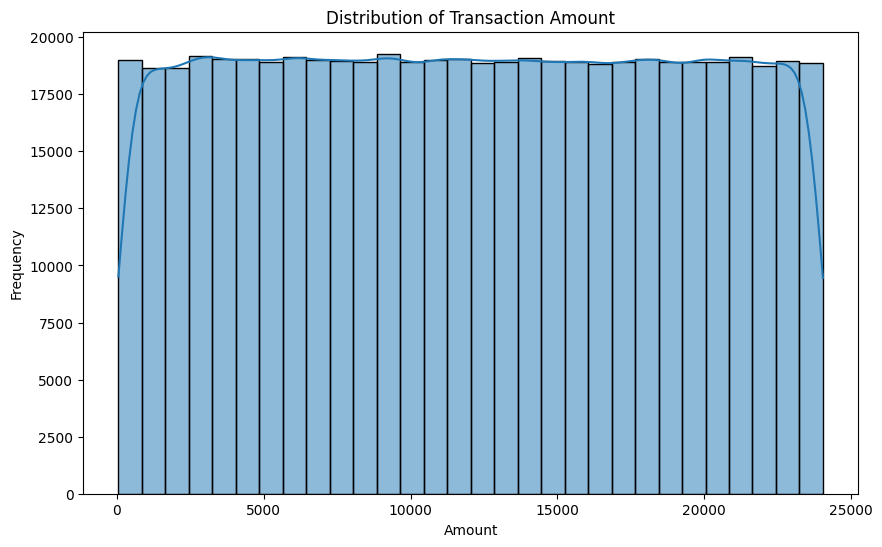

In [29]:
# Plot the distribution of the 'Amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data['Amount'], kde=True, bins=30)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

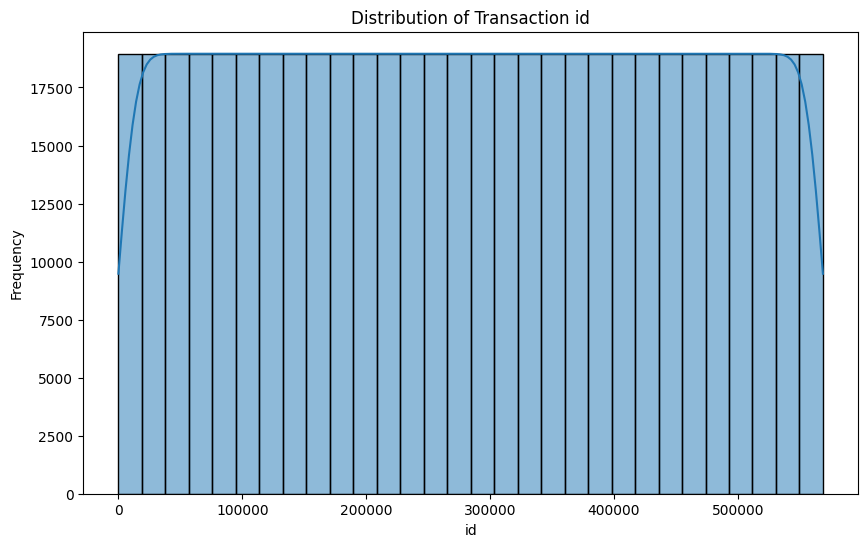

In [30]:
# Plot the distribution of the 'id' feature
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data['id'], kde=True, bins=30)
plt.title('Distribution of Transaction id')
plt.xlabel('id')
plt.ylabel('Frequency')
plt.show()

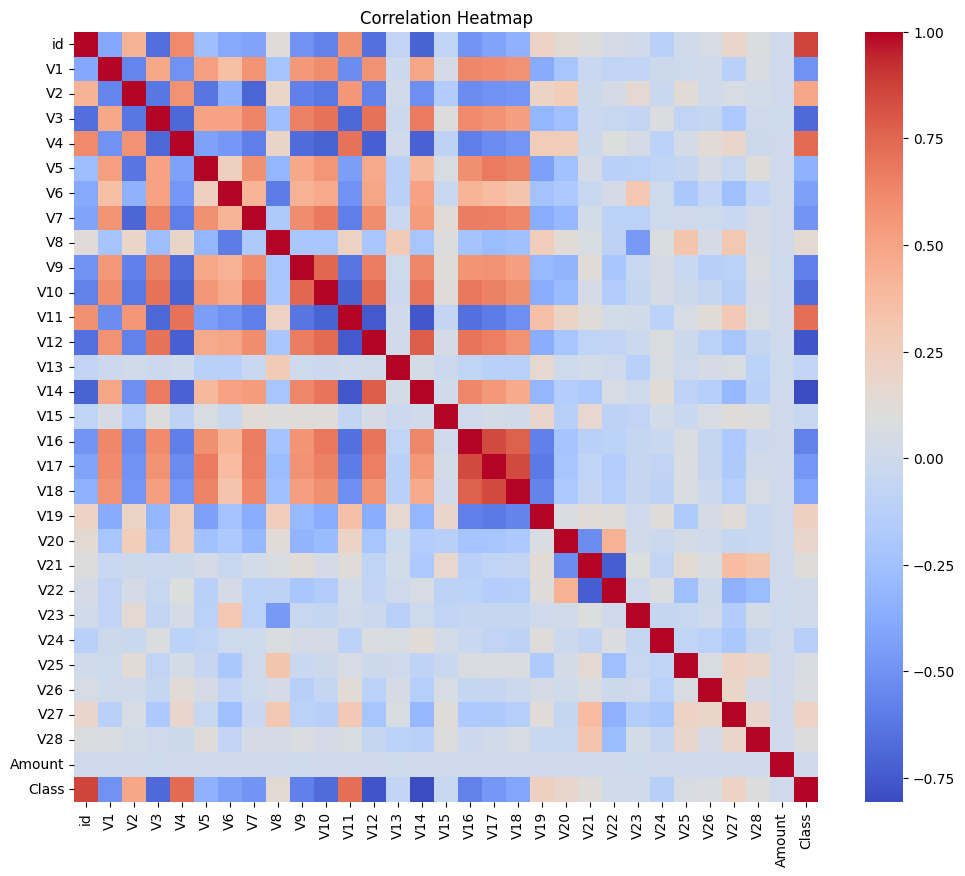

In [31]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
corr = credit_card_data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
scaler = StandardScaler()
credit_card_data['Amount'] = scaler.fit_transform(credit_card_data['Amount'].values.reshape(-1, 1))

In [33]:
# Example transaction data
new_transaction = {
    'id': 100000,
    'V1': -1.3598071336738,
    'V2': -0.0727811733098497,
    'V3': 2.53634673796914,
    'V4': 1.37815522427443,
    'V5': -0.338320769942518,
    'V6': 0.462387777762292,
    'V7': 0.239598554061257,
    'V8': 0.0986979012610507,
    'V9': 0.36378696961081,
    'V10': 0.090794171978831,
    'V11': -0.551599533260813,
    'V12': -0.617800855762348,
    'V13': -0.991389847235408,
    'V14': -0.311169353699879,
    'V15': 1.46817697209612,
    'V16': -0.470400525259478,
    'V17': 0.207971241929242,
    'V18': 0.0257905801965587,
    'V19': 0.403992960255733,
    'V20': 0.251412098259138,
    'V21': -0.018306777944153,
    'V22': 0.277837575558899,
    'V23': -0.110473910188727,
    'V24': 0.0669280749146731,
    'V25': 0.128539358273528,
    'V26': -0.189114843888824,
    'V27': 0.133558376740387,
    'V28': -0.021053053453821,
    'Amount': 123.5
}

# Convert the dictionary to a DataFrame
new_transaction_df = pd.DataFrame([new_transaction])

# Scale the 'Amount' feature
new_transaction_df['Amount'] = scaler.transform(new_transaction_df['Amount'].values.reshape(-1, 1))

# Predict the class
prediction = model.predict(new_transaction_df)
probability = model.predict_proba(new_transaction_df)[:, 1]

print(f'Prediction: {"Fraud" if prediction[0] == 1 else "Not Fraud"}')
print(f'Probability of Fraud: {probability[0]:.4f}')

Prediction: Not Fraud
Probability of Fraud: 0.0000


In [34]:
# Example transaction data
new_non_fraud_transaction = {
    'id': 10000,
    'V1': -0.5448621018518518,
    'V2': 0.5448621018518518,
    'V3': -0.5448621018518518,
    'V4': 1.5448621018518518,
    'V5': -0.5448621018518518,
    'V6': 0.5448621018518518,
    'V7': -0.5448621018518518,
    'V8': 0.5448621018518518,
    'V9': -0.5448621018518518,
    'V10': 0.5448621018518518,
    'V11': -1.5448621018518518,
    'V12': 1.5448621018518518,
    'V13': -0.5448621018518518,
    'V14': 0.5448621018518518,
    'V15': -0.5448621018518518,
    'V16': 0.5448621018518518,
    'V17': -0.5448621018518518,
    'V18': 0.5448621018518518,
    'V19': -0.5448621018518518,
    'V20': 0.5448621018518518,
    'V21': -0.5448621018518518,
    'V22': 0.5448621018518518,
    'V23': -0.5448621018518518,
    'V24': 0.5448621018518518,
    'V25': -0.5448621018518518,
    'V26': 0.5448621018518518,
    'V27': -0.5448621018518518,
    'V28': 0.5448621018518518,
    'Amount': 2000.0  # Small transaction amount
}

# Convert the dictionary to a DataFrame
new_non_fraud_transaction_df = pd.DataFrame([new_non_fraud_transaction])

# Scale the 'Amount' feature
new_non_fraud_transaction_df['Amount'] = scaler.transform(new_non_fraud_transaction_df['Amount'].values.reshape(-1, 1))

# Predict the class
prediction = model.predict(new_non_fraud_transaction_df)
probability = model.predict_proba(new_non_fraud_transaction_df)[:, 1]

print(f'Prediction: {"Fraud" if prediction[0] == 1 else "Not Fraud"}')
print(f'Probability of Fraud: {probability[0]:.4f}')

Prediction: Not Fraud
Probability of Fraud: 0.0000
